<a href="https://colab.research.google.com/github/krishnadixit05/AI/blob/main/AI_lab_4(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.	Load the basic libraries and packages

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [ ]:
# 2.	Load the dataset

from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Split data into training and validation sets
valid_X, valid_Y = train_X[:5000], train_Y[:5000]
train_X, train_Y = train_X[5000:], train_Y[5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 3.	Analyse the dataset

print(f"Training data shape: {train_X.shape}, Labels shape: {train_Y.shape}")
print(f"Validation data shape: {valid_X.shape}, Labels shape: {valid_Y.shape}")
print(f"Test data shape: {test_X.shape}, Labels shape: {test_Y.shape}")
print("Unique classes:", np.unique(train_Y))


Training data shape: (55000, 28, 28), Labels shape: (55000,)
Validation data shape: (5000, 28, 28), Labels shape: (5000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 4.	Normalize the data

# Normalize pixel values to range 0-1
train_X = train_X.astype('float32') / 255.0
valid_X = valid_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0


In [ ]:
# 5.	Pre-process the data

# Reshape to include channel dimension
train_X = train_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
num_classes = 10
train_label = to_categorical(train_Y, num_classes)
valid_label = to_categorical(valid_Y, num_classes)
test_Y_one_hot = to_categorical(test_Y, num_classes)


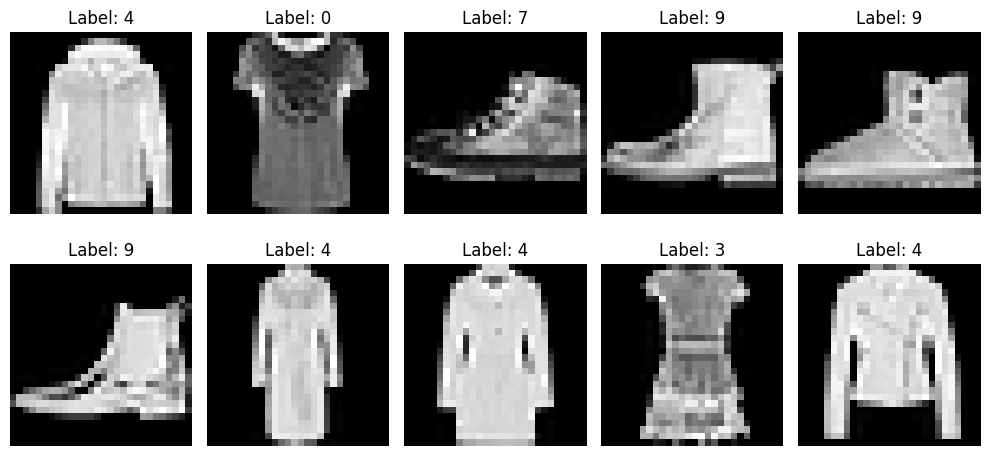

In [ ]:
# 6.	Visualize the Data

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_Y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# 7.	Write the CNN model function

def create_cnn_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='linear', padding='same', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear', padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear', padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='linear'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    return model


In [ ]:
# 8.	Write the Cost Function

# Categorical Crossentropy as the loss function
cost_function = tf.keras.losses.CategoricalCrossentropy()


In [ ]:
# 9.	Write the Gradient Descent optimization algorithm

# Adam optimizer with default parameters
optimizer = tf.keras.optimizers.Adam()


In [ ]:
# 10.	Apply the training over the dataset to minimize the loss

fashion_model = create_cnn_model()
fashion_model.compile(loss=cost_function, optimizer=optimizer, metrics=['accuracy'])

# Train the model
fashion_train = fashion_model.fit(
    train_X, train_label,
    batch_size=64, epochs=20,
    verbose=1, validation_data=(valid_X, valid_label)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 118s 132ms/step - accuracy: 0.6928 - loss: 0.8301 - val_accuracy: 0.8812 - val_loss: 0.3291
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.8584 - loss: 0.3817 - val_accuracy: 0.9016 - val_loss: 0.2733
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 141s 132ms/step - accuracy: 0.8792 - loss: 0.3272 - val_accuracy: 0.8968 - val_loss: 0.2619
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 144s 135ms/step - accuracy: 0.8881 - loss: 0.3022 - val_accuracy: 0.9152 - val_loss: 0.2320
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 114s 133ms/step - accuracy: 0.8979 - loss: 0.2751 - val_accuracy: 0.9186 - val_loss: 0.2210
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 111s 129ms/step - accuracy: 0.9000 - loss: 0.2611 - val_accuracy: 0.9202 - val_loss: 0.2164
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 141s 127ms/step - accuracy: 0.9068 - loss: 0.2490 - val_accuracy: 0.9168 - val_loss: 0.2238
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 111s 129ms/step - accuracy: 0.9103 -

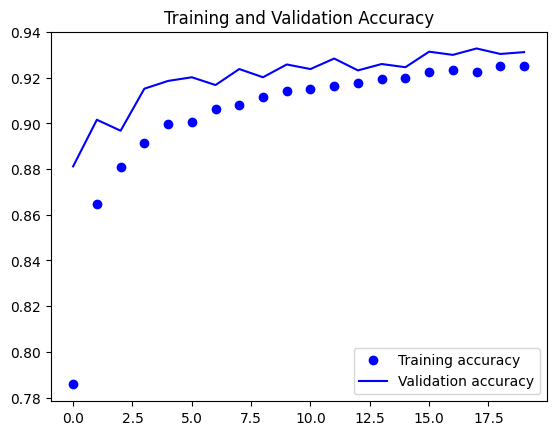

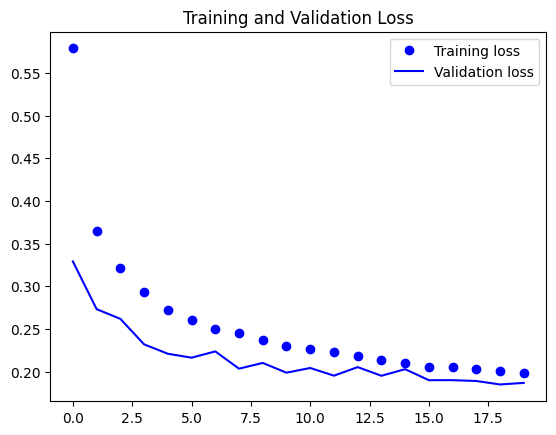

In [ ]:
# 11.	Observe the cost function vs iterations learning curve

accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

# Accuracy Curve
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# Loss Curve
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Result

In [ ]:
# a.	Training dataset

print("Training data shape:", train_X.shape)
print("Validation data shape:", valid_X.shape)
print("Test data shape:", test_X.shape)
print("Number of classes:", num_classes)
print("Unique classes:", np.unique(train_Y))

Training data shape: (55000, 28, 28, 1)
Validation data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Number of classes: 10
Unique classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# b.	Model summary

# Before Regularization
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='linear', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 111s 126ms/step - accuracy: 0.7685 - loss: 0.6339 - val_accuracy: 0.8868 - val_loss: 0.3094
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - accuracy: 0.8993 - loss: 0.2801 - val_accuracy: 0.9076 - val_loss: 0.2627
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 144s 128ms/step - accuracy: 0.9132 - loss: 0.2340 - val_accuracy: 0.9136 - val_loss: 0.2332
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.9227 - loss: 0.2067 - val_accuracy: 0.9166 - val_loss: 0.2294
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 140s 125ms/step - accuracy: 0.9337 - loss: 0.1766 - val_accuracy: 0.9190 - val_loss: 0.2171
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 138s 121ms/step - accuracy: 0.9457 - loss: 0.1498 - val_accuracy: 0.9254 - val_loss: 0.2103
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 145s 125ms/step - accuracy: 0.9513 - loss: 0.1305 - val_accuracy: 0.9192 - val_loss: 0.2341
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 139s 122ms/step - accuracy: 0.9612 -

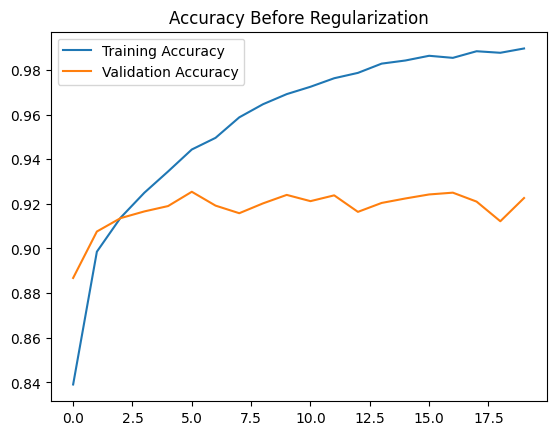

In [ ]:
# c.	Training and validation accuracy w.r.t epochs before regularization

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Train model without regularization
train_no_reg = model.fit(train_X, train_label, batch_size=64, epochs=20, validation_data=(valid_X, valid_label))

plt.plot(train_no_reg.history['accuracy'], label='Training Accuracy')
plt.plot(train_no_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Before Regularization')
plt.legend()
plt.show()


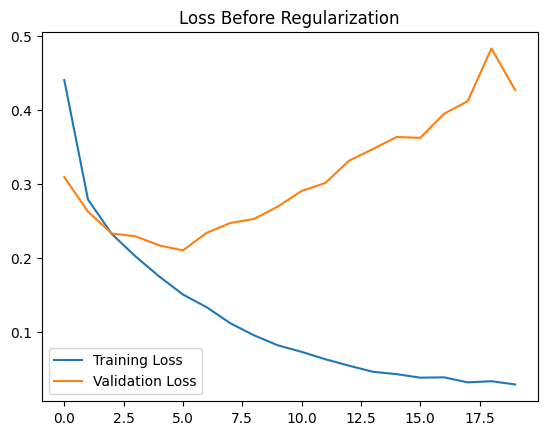

In [ ]:
# d.	Training and validation loss w.r.t epochs before regularization

plt.plot(train_no_reg.history['loss'], label='Training Loss')
plt.plot(train_no_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss Before Regularization')
plt.legend()
plt.show()


Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 121s 138ms/step - accuracy: 0.6963 - loss: 0.8150 - val_accuracy: 0.8718 - val_loss: 0.3397
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 142s 138ms/step - accuracy: 0.8599 - loss: 0.3797 - val_accuracy: 0.8930 - val_loss: 0.2973
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 143s 139ms/step - accuracy: 0.8768 - loss: 0.3310 - val_accuracy: 0.9014 - val_loss: 0.2579
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 117s 136ms/step - accuracy: 0.8881 - loss: 0.2994 - val_accuracy: 0.9054 - val_loss: 0.2487
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 144s 138ms/step - accuracy: 0.8967 - loss: 0.2809 - val_accuracy: 0.9134 - val_loss: 0.2255
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 139s 135ms/step - accuracy: 0.9000 - loss: 0.2628 - val_accuracy: 0.9146 - val_loss: 0.2390
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 145s 138ms/step - accuracy: 0.9048 - loss: 0.2553 - val_accuracy: 0.9176 - val_loss: 0.2216
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 117s 136ms/step - accuracy: 0.9091 -

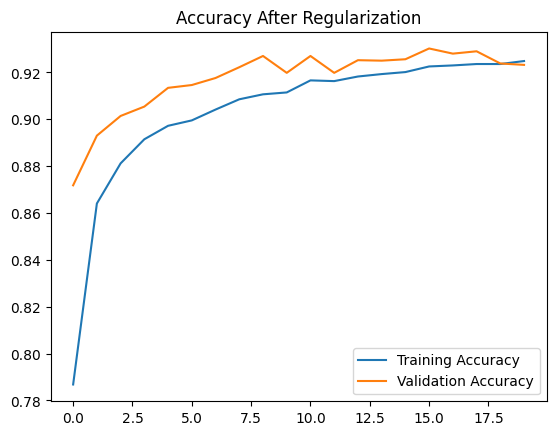

In [ ]:
# e.	Training and validation accuracy w.r.t epochs after regularization

# Model with Dropout Regularization
reg_model = create_cnn_model()
reg_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

train_with_reg = reg_model.fit(train_X, train_label, batch_size=64, epochs=20, validation_data=(valid_X, valid_label))

plt.plot(train_with_reg.history['accuracy'], label='Training Accuracy')
plt.plot(train_with_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy After Regularization')
plt.legend()
plt.show()


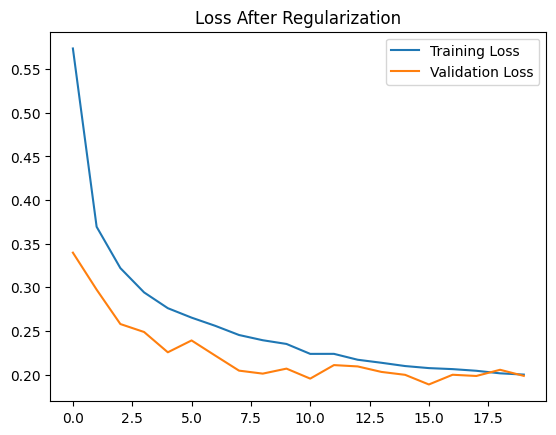

In [ ]:
# f.	Training and validation loss w.r.t epochs after regularization

plt.plot(train_with_reg.history['loss'], label='Training Loss')
plt.plot(train_with_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss After Regularization')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Number of Correct Predictions: 9187


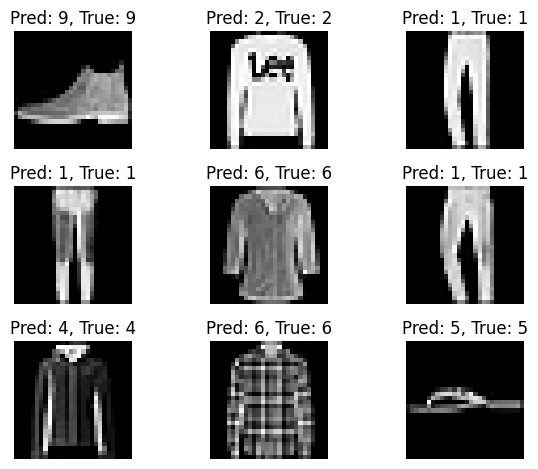

In [ ]:
# g.	Original v/s predicted labels for correct predicted observations

predicted_classes = np.argmax(reg_model.predict(test_X), axis=1)
correct_indices = np.where(predicted_classes == test_Y)[0]

print(f"Number of Correct Predictions: {len(correct_indices)}")
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[correct]}, True: {test_Y[correct]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Number of Incorrect Predictions: 813


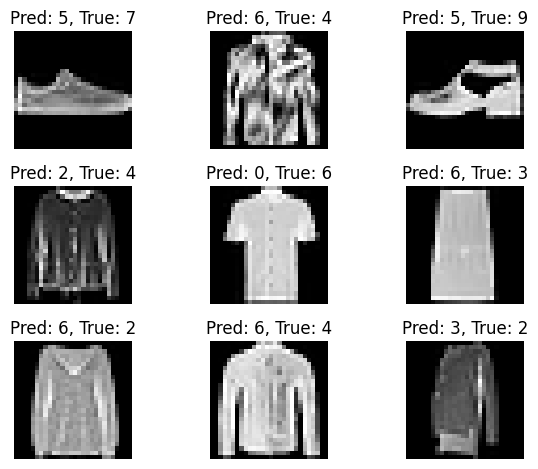

In [ ]:
# h.	Original v/s predicted labels for incorrect predicted observations

incorrect_indices = np.where(predicted_classes != test_Y)[0]

print(f"Number of Incorrect Predictions: {len(incorrect_indices)}")
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[incorrect]}, True: {test_Y[incorrect]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
